# 0.) Import and Clean data

In [34]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
drive.mount('/content/drive/', force_remount = True)
import os
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive/


In [37]:
df = pd.read_csv('bank-additional-full (1).csv', sep = ';')

In [38]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [40]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

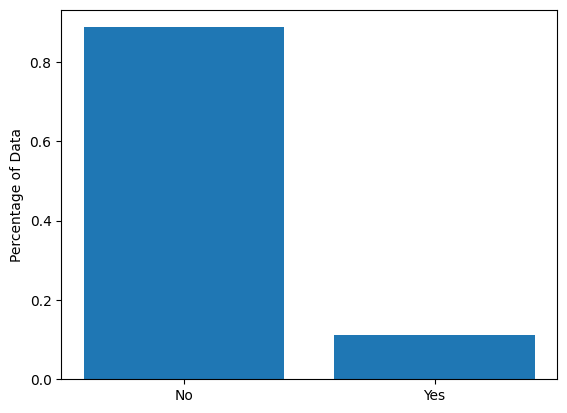

In [42]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [43]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [44]:
###############
###TRANSFORM###
###############

#X_scaled = #???
#y_train = #???

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [46]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(smote_X, smote_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.169\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.294\nsamples = 19863\nvalue = [16302, 3561]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.112\nsamples = 10489\nvalue = [9867, 622]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.096\nsamples = 10296\nvalue = [9776, 520]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.498\nsamples = 193\nvalue = [91, 102]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.43\nsamples = 9374\nvalue = [6435, 2939]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 6811\nvalue = [3971, 2840]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 2563\nvalue = [2464, 99]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.417\nsamples = 31297\nvalue = [9278, 22019]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.337\nsamples = 25731\nvalue = [5519, 20212]\nclass =

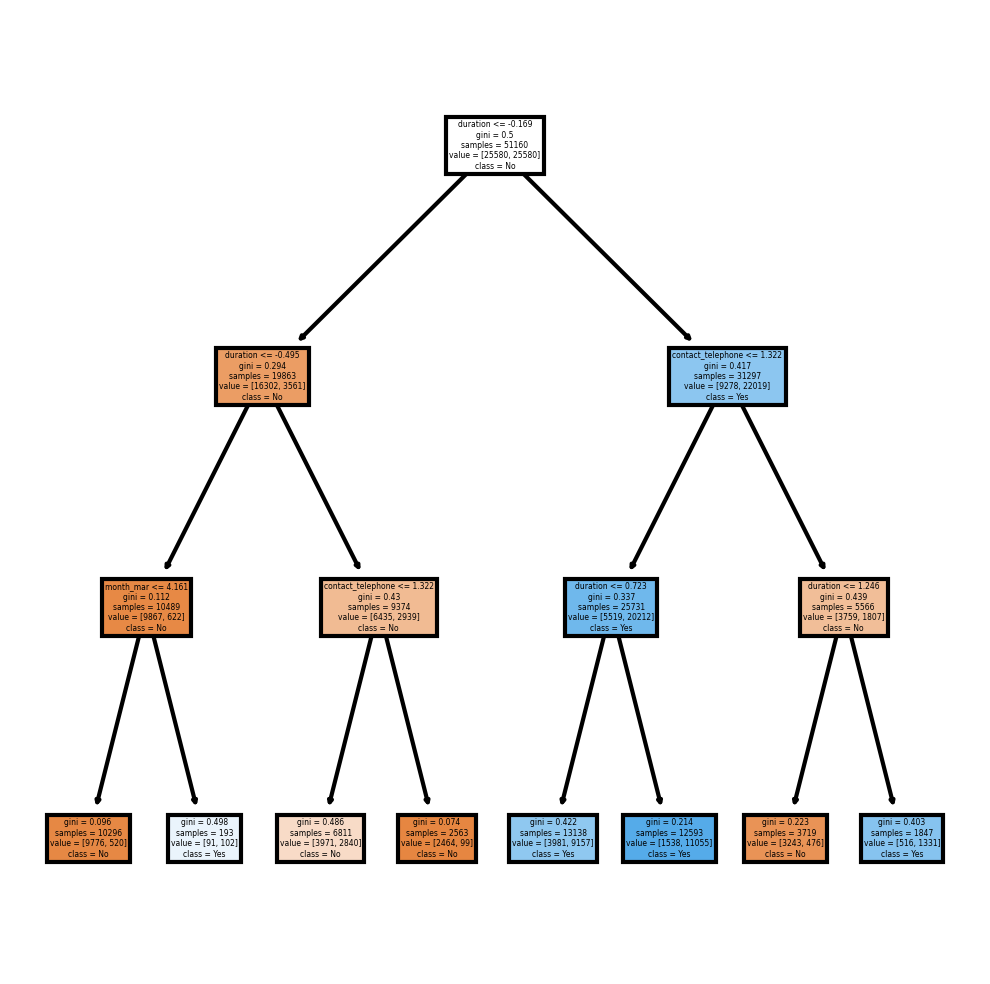

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [48]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

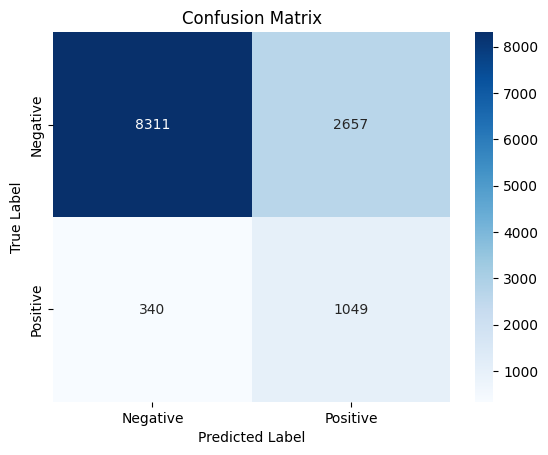

In [49]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [50]:
# placeholder for optimizing max depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [51]:
bagging = BaggingClassifier(estimator = dtree,
                  n_estimators = 100,
                  max_samples = .5,
                  max_features = 1.)

In [52]:
bagging.fit(smote_X, smote_y)
y_pred = bagging.predict(X_test)

In [53]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

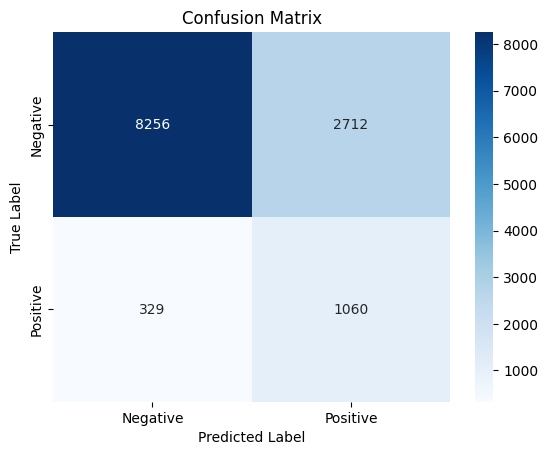

In [54]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [57]:
boost = AdaBoostClassifier(estimator = dtree,
                  n_estimators = 100,
                  learning_rate = .1)
boost.fit(smote_X, smote_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)

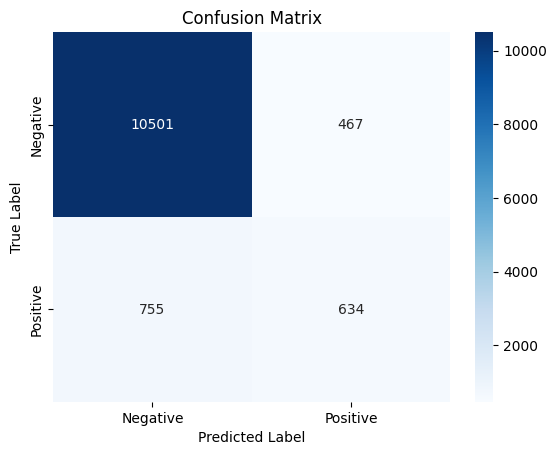

In [58]:
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic Regression (Super Learner) on the Decision Tree, Boosted Tree, Bagged Tree Interpret your coefficients and save your CM.

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
base_predictions = [list(dtree_main.predict(smote_X)),
list(boost.predict(smote_X)),
list(bagging.predict(smote_X))]

In [61]:
super_learner = LogisticRegression()

In [62]:
base_predictions = np.array(base_predictions).transpose()

In [63]:
super_learner.fit(base_predictions, smote_y)

LogisticRegression()

In [64]:
super_learner.coef_

array([[0.66540993, 4.98470416, 0.69046948]])

# 6.) Interpret the coefficient

The coefficients indicate contribution of each base model's predictions to the final prediction of the super learner. According to the coefficients of the super learner, the boosted tree model appears to be the most influential predictor in this ensemble, followed by the bagged tree model and then the decision tree model.